# Simulação de Monte Carlo utilizando POO - atividade intermediária bonus

Nessa atividade, foi utilizado conhecimento de programação orientada a objetos para calcular o valor aproximado de $\pi$ via simulação de Monte Carlo. Para isso, foi criada a classe ```CalcPi``` que possuí em tres funções: ```monte_Carlo_pi()```, ```resultado_pi()``` e ```grafico_pontos()``` , como também a função especial ```__init__``` . Além disso,   Na função ```__init__```, ```pontos```  indica o números de pontos que rodará na simulação e ```retorna_pontos``` um booleano.  Na função ```monte_Carlo_pi()```, foram criadas duas listas, ```self.pontos_internos``` e ```self.pontos_externos```, para receber os pares ordenados aleatórios que estão contidos (ou não) na circunferencia. Além disso, diferentemente da atividade mínima, foi utilizado ```self.pontos_internos.append((x,y))``` para adicionar os pontos que estão dentro da condição especificada( dentro do circulo $x^2 + y^2 <=1$). Caso contrário, adiciona na lista dos pontos externos.

Na função ```resultado_pi```, indica que se ```retorna_pontos``` for False, a simulação recebe apenas a aproximação do $\pi$, mas se for True recebe o valor de $\pi$ e as listas. 

Para o plot do gráfico foi utilizado list comprehension, a partir do ```plt.scatter``` que foi utilizado para plotar os pontos internos e externos dentro do círculo definido na função ```def grafico_pontos()```. Nesse sentido, uma vez que os pontos internos e externos foram definidos como uma lista, foi utilizado o index ```x[0]``` para indicar o primeiro elemento da tupla e ```y[1]``` para indicar o segundo elemento, formando assim um par ordenado para definir um ponto. Dessa maneira, essa função varre toda a lista pontos internos, associando cada parte ordenado. Além disso, foi utilizado o parametro ```s``` para ajustar o tamanho do ponto(pixels) e ```alpha``` para indicar a transparencia do ponto. 

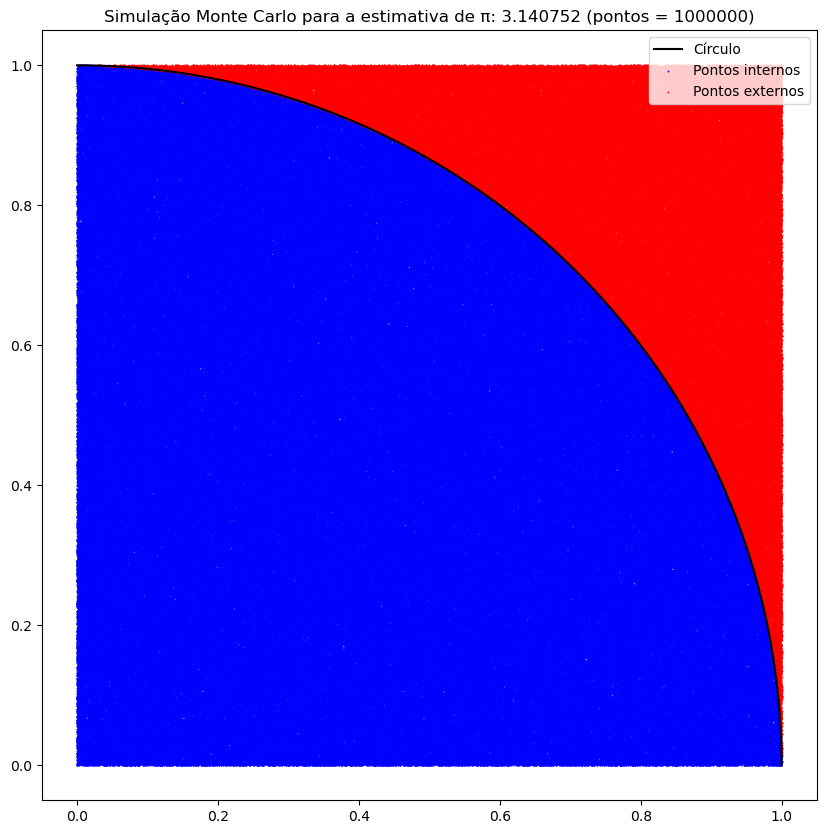

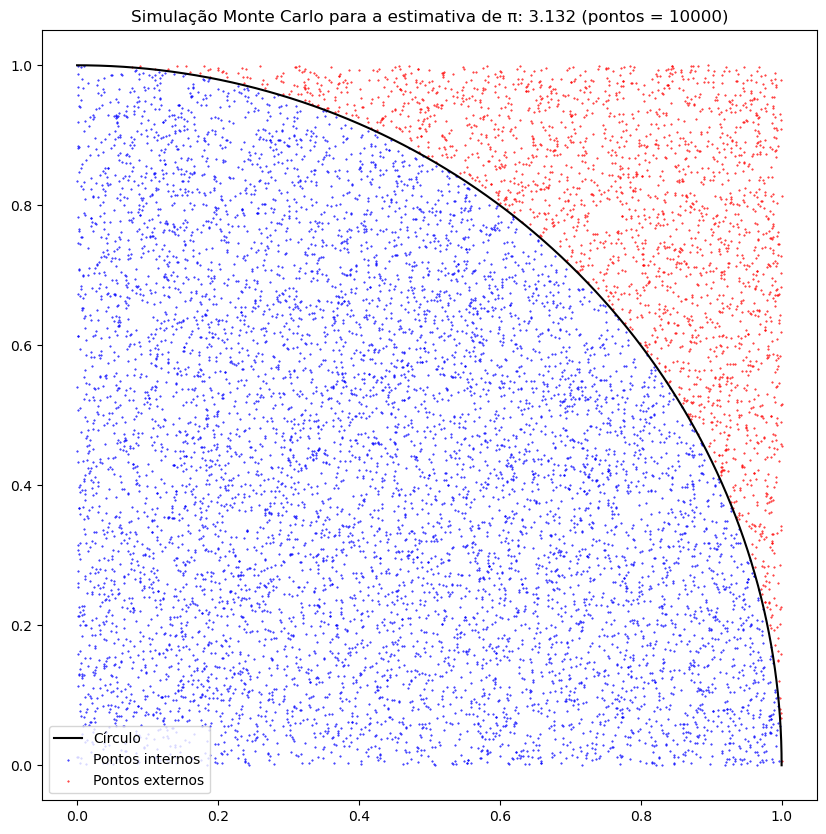

3.132
3.140752


In [5]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

class CalcPi():
    def __init__(self, pontos, retorna_pontos=False):
        self.pontos = pontos
        self.retorna_pontos = retorna_pontos
        self.pontos_internos = []
        self.pontos_externos = []

    def monte_Carlo_pi(self):
        for i in range(self.pontos):
            x= random.uniform(0,1)  #um float aleatorio entre o intervalo 0 e 1
            y= random.uniform(0,1)
            if x**2 + y**2 <=1:
                self.pontos_internos.append((x,y))
            else:
                self.pontos_externos.append((x,y))
        self.estimativa_pi  = 4 * len(self.pontos_internos)/ self.pontos

    def  resultado_pi(self):
        self.monte_Carlo_pi()

        if self.retorna_pontos:
            return self.estimativa_pi, self.pontos_internos, self.pontos_externos
        else:
            return self.estimativa_pi
        
    def grafico_pontos(self):
        r = 1
        theta = np.linspace(0 , np.pi/2 , 1000)
        x1= r* np.cos(theta)
        y1  = r * np.sin(theta)
        plt.figure(figsize=(10, 10))
        plt.plot(x1, y1, color = 'black', label = 'Círculo')
        plt.scatter([x[0] for x in self.pontos_internos], [y[1] for y in self.pontos_internos] , label = 'Pontos internos', s=0.2, alpha=1, color = 'blue')
        plt.scatter([x[0] for x in self.pontos_externos], [y[1] for y in self.pontos_externos] , label = 'Pontos externos', s=0.2, alpha=1, color = 'red')
        plt.title(f'Simulação Monte Carlo para a estimativa de π: {self.estimativa_pi} (pontos = {self.pontos})')
        plt.legend()
        plt.show()


if __name__ == '__main__':
    simulacao1 = CalcPi(10000, False)
    simulacao2 =CalcPi(1000000, False)
    resultado1=  simulacao1.resultado_pi()
    resultado2 = simulacao2.resultado_pi()
    grafico1  = simulacao2.grafico_pontos()
    grafico2 = simulacao1.grafico_pontos()
    print(resultado1)
    print(resultado2)